<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/Simplepointtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple de suivi par points

In [1]:
import cv2 
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

Lecture de deux images tests et affichage.

In [2]:
image_name = 'in000235.jpg'
if not os.path.exists(image_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000235.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000240.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000216.jpg

Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000235.jpg
To: /content/in000235.jpg
100% 177k/177k [00:00<00:00, 2.80MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000240.jpg
To: /content/in000240.jpg
100% 177k/177k [00:00<00:00, 2.79MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000216.jpg
To: /content/in000216.jpg
100% 178k/178k [00:00<00:00, 2.80MB/s]


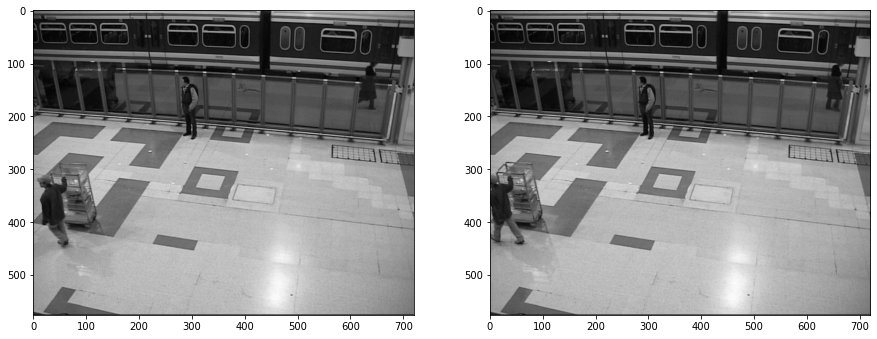

In [3]:
image1 = cv2.imread('in000235.jpg',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('in000240.jpg',cv2.IMREAD_GRAYSCALE) 

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(image2,cmap = plt.get_cmap('gray'))
plt.show()

Définition de la région d'intérêt

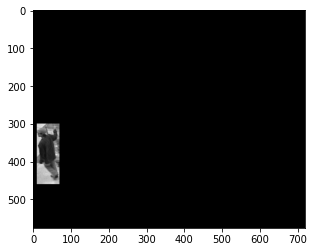

In [4]:
mask = np.zeros(image1.shape,np.uint8)
# Pour suivre une des trois personnes
#mask[90:200,615:650] = 1  
#mask[120:240,270:315] = 1  
mask[300:460,10:70] = 1  
res = cv2.bitwise_and(image1,image1,mask = mask)
plt.figure()
plt.imshow(res,cmap = plt.get_cmap('gray'))
plt.show()

Extraction des points-clefs et affichage

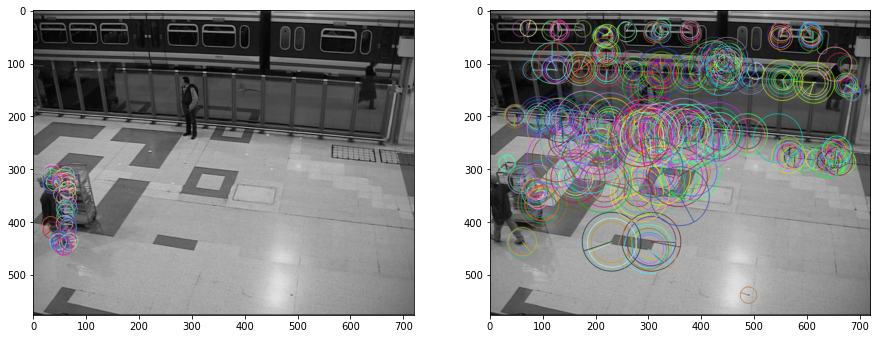

In [5]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(image1, mask = mask)
kp2, des2 = orb.detectAndCompute(image2, None)

imageout1 = cv2.drawKeypoints(image1,kp1,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imageout2 = cv2.drawKeypoints(image2,kp2,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(imageout1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(imageout2,cmap = plt.get_cmap('gray'))
plt.show()

Calcul des correspondances et affichage de celles-ci.

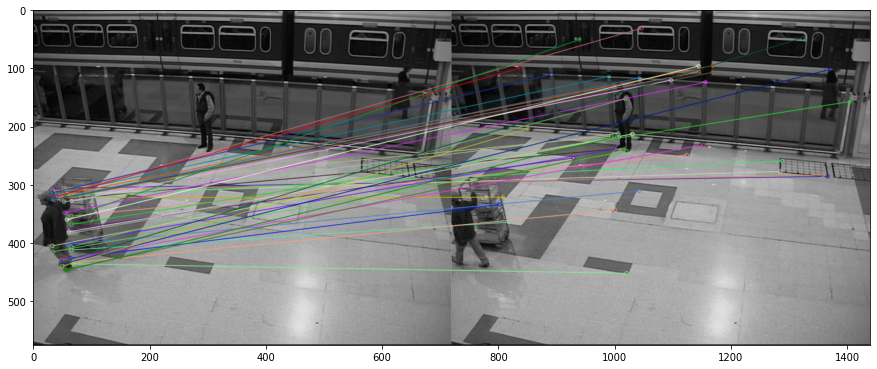

In [6]:
bf = cv2.BFMatcher_create(cv2.NORM_L2, crossCheck=True)
correspondances = bf.match(des1,des2)
plt.figure(figsize = (15,10))
imageout3 = cv2.drawMatches(image1,kp1,image2,kp2,correspondances, None, flags = 2)
plt.imshow(imageout3)
plt.show()

Calcul d'un rectangle englobant autour des meilleurs points-clefs, et affichage de celui-ci.

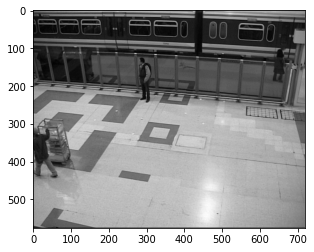

In [7]:
xmax = 0
xmin = 10000
ymax = 0
ymin = 10000 
for kp in correspondances:
    #1 On élimine les mauvaises correspondances
    if (abs(kp2[kp.trainIdx].pt[0] - kp1[kp.queryIdx].pt[0]) + abs(kp2[kp.trainIdx].pt[1] - kp1[kp.queryIdx].pt[1])) <60:    
        #Suppose un déplacement entre deux trames < D 
        #2 Si la correspondance est bonne, on l'utilise pour calculer le rectangle englobant
        if kp2[kp.trainIdx].pt[0] < xmin:
            xmin = int(kp2[kp.trainIdx].pt[0])
        if kp2[kp.trainIdx].pt[0] > xmax:
            xmax = int(kp2[kp.trainIdx].pt[0])

        if kp2[kp.trainIdx].pt[1] < ymin:
            ymin = int(kp2[kp.trainIdx].pt[1])
        if kp2[kp.trainIdx].pt[1] > ymax:
            ymax = int(kp2[kp.trainIdx].pt[1])

fig,ax = plt.subplots(1)
ax.imshow(image2,cmap = plt.get_cmap('gray'))
rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

On refait les mêmes opérations pour une autre trame.

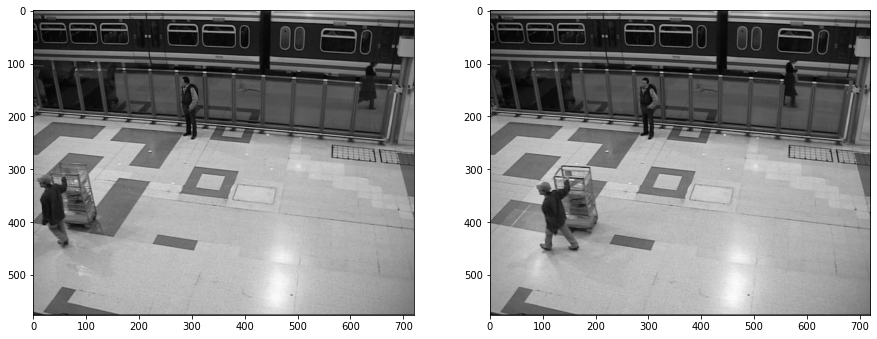

In [8]:
image3 = cv2.imread('in000216.jpg',cv2.IMREAD_GRAYSCALE) 

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(image3,cmap = plt.get_cmap('gray'))
plt.show()

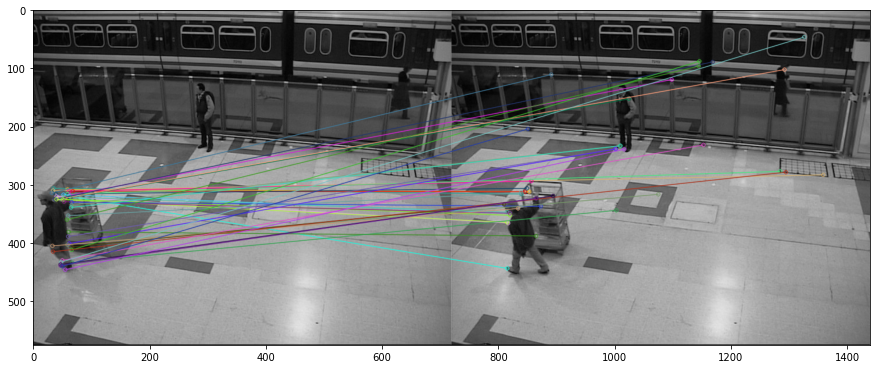

In [9]:
kp3, des3 = orb.detectAndCompute(image3, None)
bf = cv2.BFMatcher_create(cv2.NORM_L2, crossCheck=True)
correspondances = bf.match(des1,des3)
plt.figure(figsize = (15,10))
imageout3 = cv2.drawMatches(image1,kp1,image3,kp3,correspondances, None, flags = 2)
plt.imshow(imageout3)
plt.show()

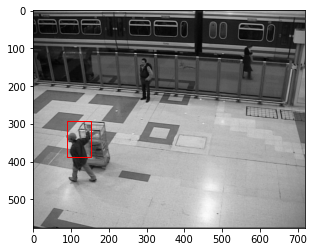

In [10]:
xmax = 0
xmin = 10000
ymax = 0
ymin = 10000 
for kp in correspondances:
    #1 On élimine les mauvaises correspondances
    if (abs(kp3[kp.trainIdx].pt[0] - kp1[kp.queryIdx].pt[0]) + abs(kp3[kp.trainIdx].pt[1] - kp1[kp.queryIdx].pt[1])) <100:    
        #Suppose un déplacement entre deux trames < D
        #2 Si la correspondance est bonne, on l'utilise pour calculer le rectangle englobant
        if kp3[kp.trainIdx].pt[0] < xmin:
            xmin = int(kp3[kp.trainIdx].pt[0])
        if kp3[kp.trainIdx].pt[0] > xmax:
            xmax = int(kp3[kp.trainIdx].pt[0])

        if kp3[kp.trainIdx].pt[1] < ymin:
            ymin = int(kp3[kp.trainIdx].pt[1])
        if kp3[kp.trainIdx].pt[1] > ymax:
            ymax = int(kp3[kp.trainIdx].pt[1])
            
fig,ax = plt.subplots(1)
ax.imshow(image3,cmap = plt.get_cmap('gray'))
rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()